# Import

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Dataset

In [5]:
fileName = 'complete_dataset.csv'
demand_dataset = pd.read_csv(fileName)

# Exploratory Data Analysis
### Dataset preview

In [6]:
# Dataset first six rows
demand_dataset.head(6)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
5,2015-01-06,130672.485,31.282311,130672.485,31.282311,0.000,0.000000,0.000000,17.7,26.0,31.6,0.0,N,N


In [7]:
# Shape of the dataset
print(demand_dataset.shape)

(2106, 14)


In [8]:
# Check dataset info and missing value
demand_dataset.info()
print(demand_dataset.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive      

In [9]:
# From the result above, we can see that there are 3 entries with rainfall value missing, and 1 entry that misses solar_exposure value 
# Find out the row that contains missing value(s)
print(demand_dataset[demand_dataset.isnull().any(axis=1)])

            date      demand        RRP  demand_pos_RRP  RRP_positive  \
161   2015-06-11  143465.445  37.481829      143465.445     37.481829   
1060  2017-11-26  108717.875  83.114514      108717.875     83.114514   
1377  2018-10-09  116449.310  99.000749      116449.310     99.000749   
1378  2018-10-10  109551.080  73.539698      109551.080     73.539698   

      demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
161              0.0           0.0              0.0              5.7   
1060             0.0           0.0              0.0             19.4   
1377             0.0           0.0              0.0             16.1   
1378             0.0           0.0              0.0             10.1   

      max_temperature  solar_exposure  rainfall school_day holiday  
161              14.0             8.3       NaN          Y       N  
1060             28.3             NaN       3.4          Y       N  
1377             17.9             7.2       NaN          Y       N

In [10]:
# Check for duplicated entry(s)
print(demand_dataset.duplicated())
print("Number of duplicated entry is :", demand_dataset.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
2101    False
2102    False
2103    False
2104    False
2105    False
Length: 2106, dtype: bool
Number of duplicated entry is : 0


# Data Visulisation

### Daily electricity demand and daily average RRP for electricity from 2015 to 2020

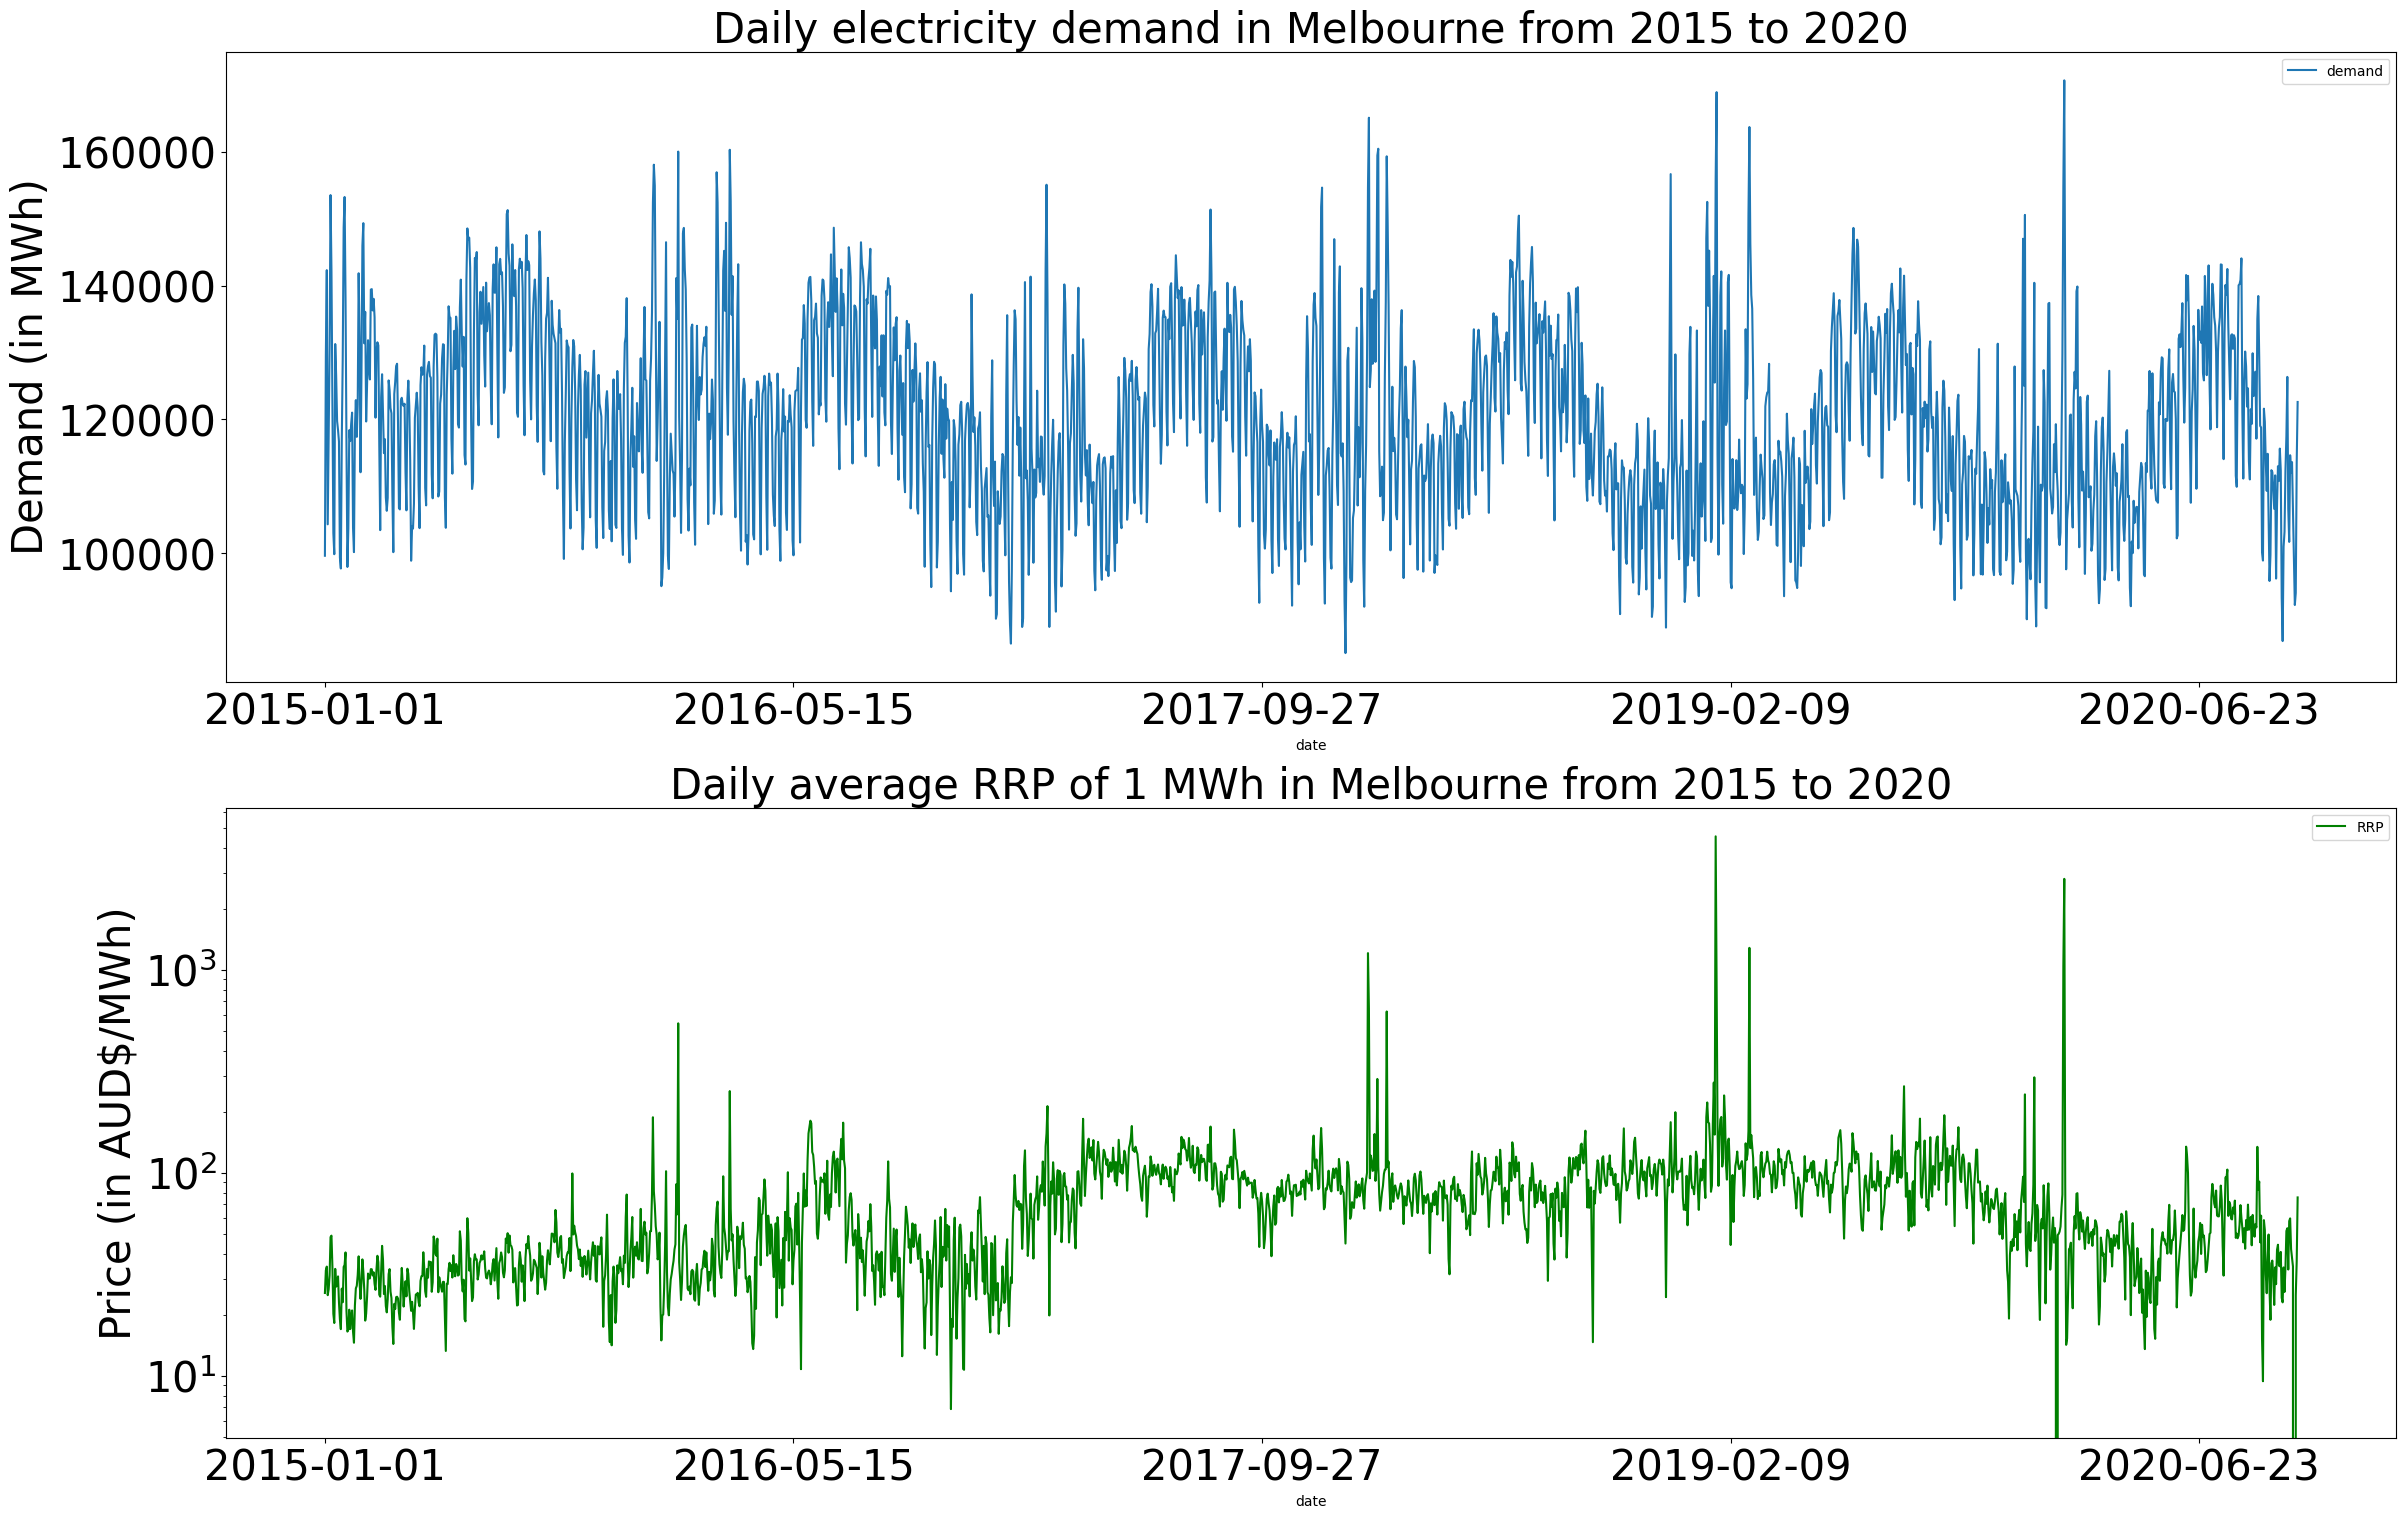

In [11]:
fig, ax = plt.subplots(2, 1, figsize = (28, 18))
ax[0].tick_params(labelsize=30)
demand_dataset.plot('date','demand', ax = ax[0])
ax[0].set_title("Daily electricity demand in Melbourne from 2015 to 2020", size = 30)
ax[0].set_ylabel("Demand (in MWh)", fontsize = 30)
# plt.grid(True)
demand_dataset.plot('date','RRP', color='green', ax = ax[1])
ax[1].tick_params(labelsize=30)
ax[1].set_title("Daily average RRP of 1 MWh in Melbourne from 2015 to 2020", size = 30)
ax[1].set_ylabel("Price (in AUD$/MWh)", fontsize = 30)
plt.yscale('log')
plt.show()

### Climate data

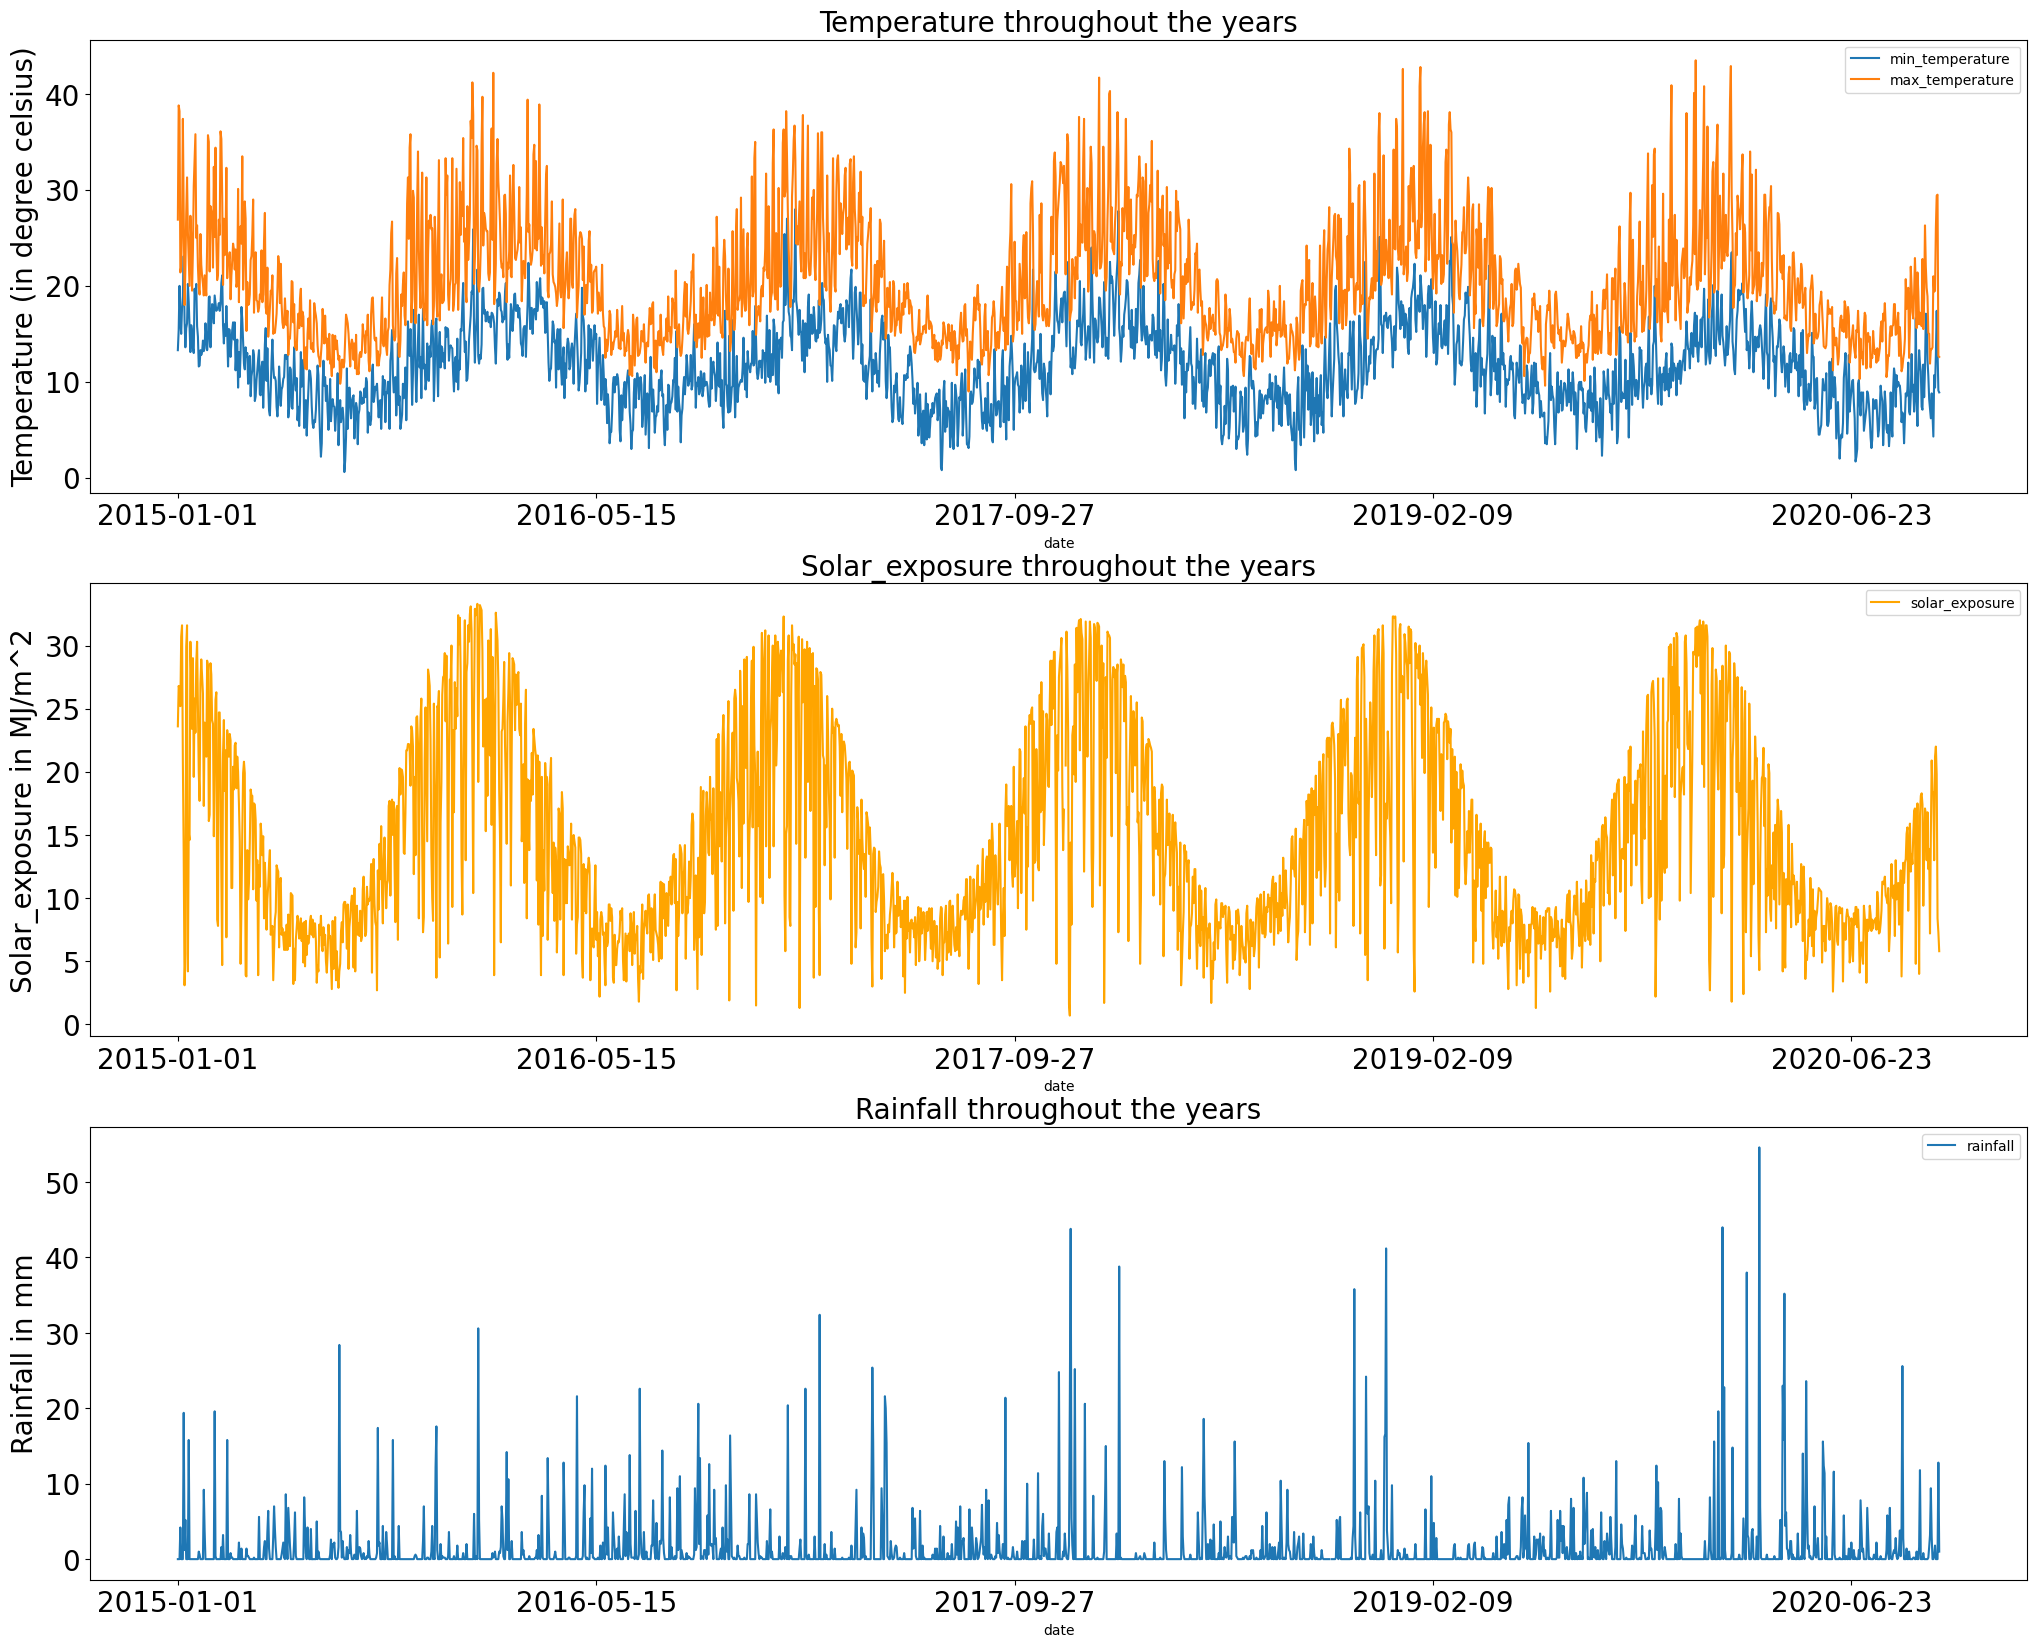

In [12]:
fig, ax = plt.subplots(3, 1, figsize = (25, 20))
demand_dataset.plot('date', ['min_temperature', 'max_temperature'], ax = ax[0])
ax[0].tick_params(labelsize=20)
ax[0].set_title("Temperature throughout the years", size = 20)
ax[0].set_ylabel("Temperature (in degree celsius)", fontsize = 20)
demand_dataset.plot('date', 'solar_exposure', ax = ax[1], color = 'orange')
ax[1].tick_params(labelsize=20)
ax[1].set_title("Solar_exposure throughout the years", size = 20)
ax[1].set_ylabel("Solar_exposure in MJ/m^2", fontsize = 20)
demand_dataset.plot('date', 'rainfall', ax = ax[2])
ax[2].tick_params(labelsize=20)
ax[2].set_title("Rainfall throughout the years", size = 20)
ax[2].set_ylabel("Rainfall in mm", fontsize = 20)
plt.show()

### Correlation Matrix

In [13]:
# Convert the data type of 'school_day' and 'holiday' into dummy variable for the heatmap
demand_dataset = pd.read_csv(fileName, index_col=0)
pd.to_datetime(demand_dataset.index)
print(demand_dataset.index)
demand_dataset.info()
demand_dataset['school_day'] = demand_dataset['school_day'].replace({'Y':1, 'N':0})
demand_dataset['holiday'] = demand_dataset['holiday'].replace({'Y':1, 'N':0})
demand_dataset[25:30]

Index(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
       '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
       ...
       '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
       '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06'],
      dtype='object', name='date', length=2106)
<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 2015-01-01 to 2020-10-06
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   demand           2106 non-null   float64
 1   RRP              2106 non-null   float64
 2   demand_pos_RRP   2106 non-null   float64
 3   RRP_positive     2106 non-null   float64
 4   demand_neg_RRP   2106 non-null   float64
 5   RRP_negative     2106 non-null   float64
 6   frac_at_neg_RRP  2106 non-null   float64
 7   min_temperature  2106 non-null   float64
 8   max_temperature  2106 non-null   float64
 9   sola

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2015-01-26,103769.480,16.936013,103769.480,16.936013,0.0,0.0,0.0,11.6,19.8,19.9,1.0,0,1
2015-01-27,118393.310,21.206289,118393.310,21.206289,0.0,0.0,0.0,11.7,19.1,17.7,0.6,0,0
2015-01-28,116763.725,17.023838,116763.725,17.023838,0.0,0.0,0.0,13.3,25.4,27.0,0.0,0,0
2015-01-29,119313.730,19.624827,119313.730,19.624827,0.0,0.0,0.0,12.8,22.2,28.9,0.0,1,0
2015-01-30,121018.150,21.029356,121018.150,21.029356,0.0,0.0,0.0,13.1,21.0,27.6,0.0,1,0


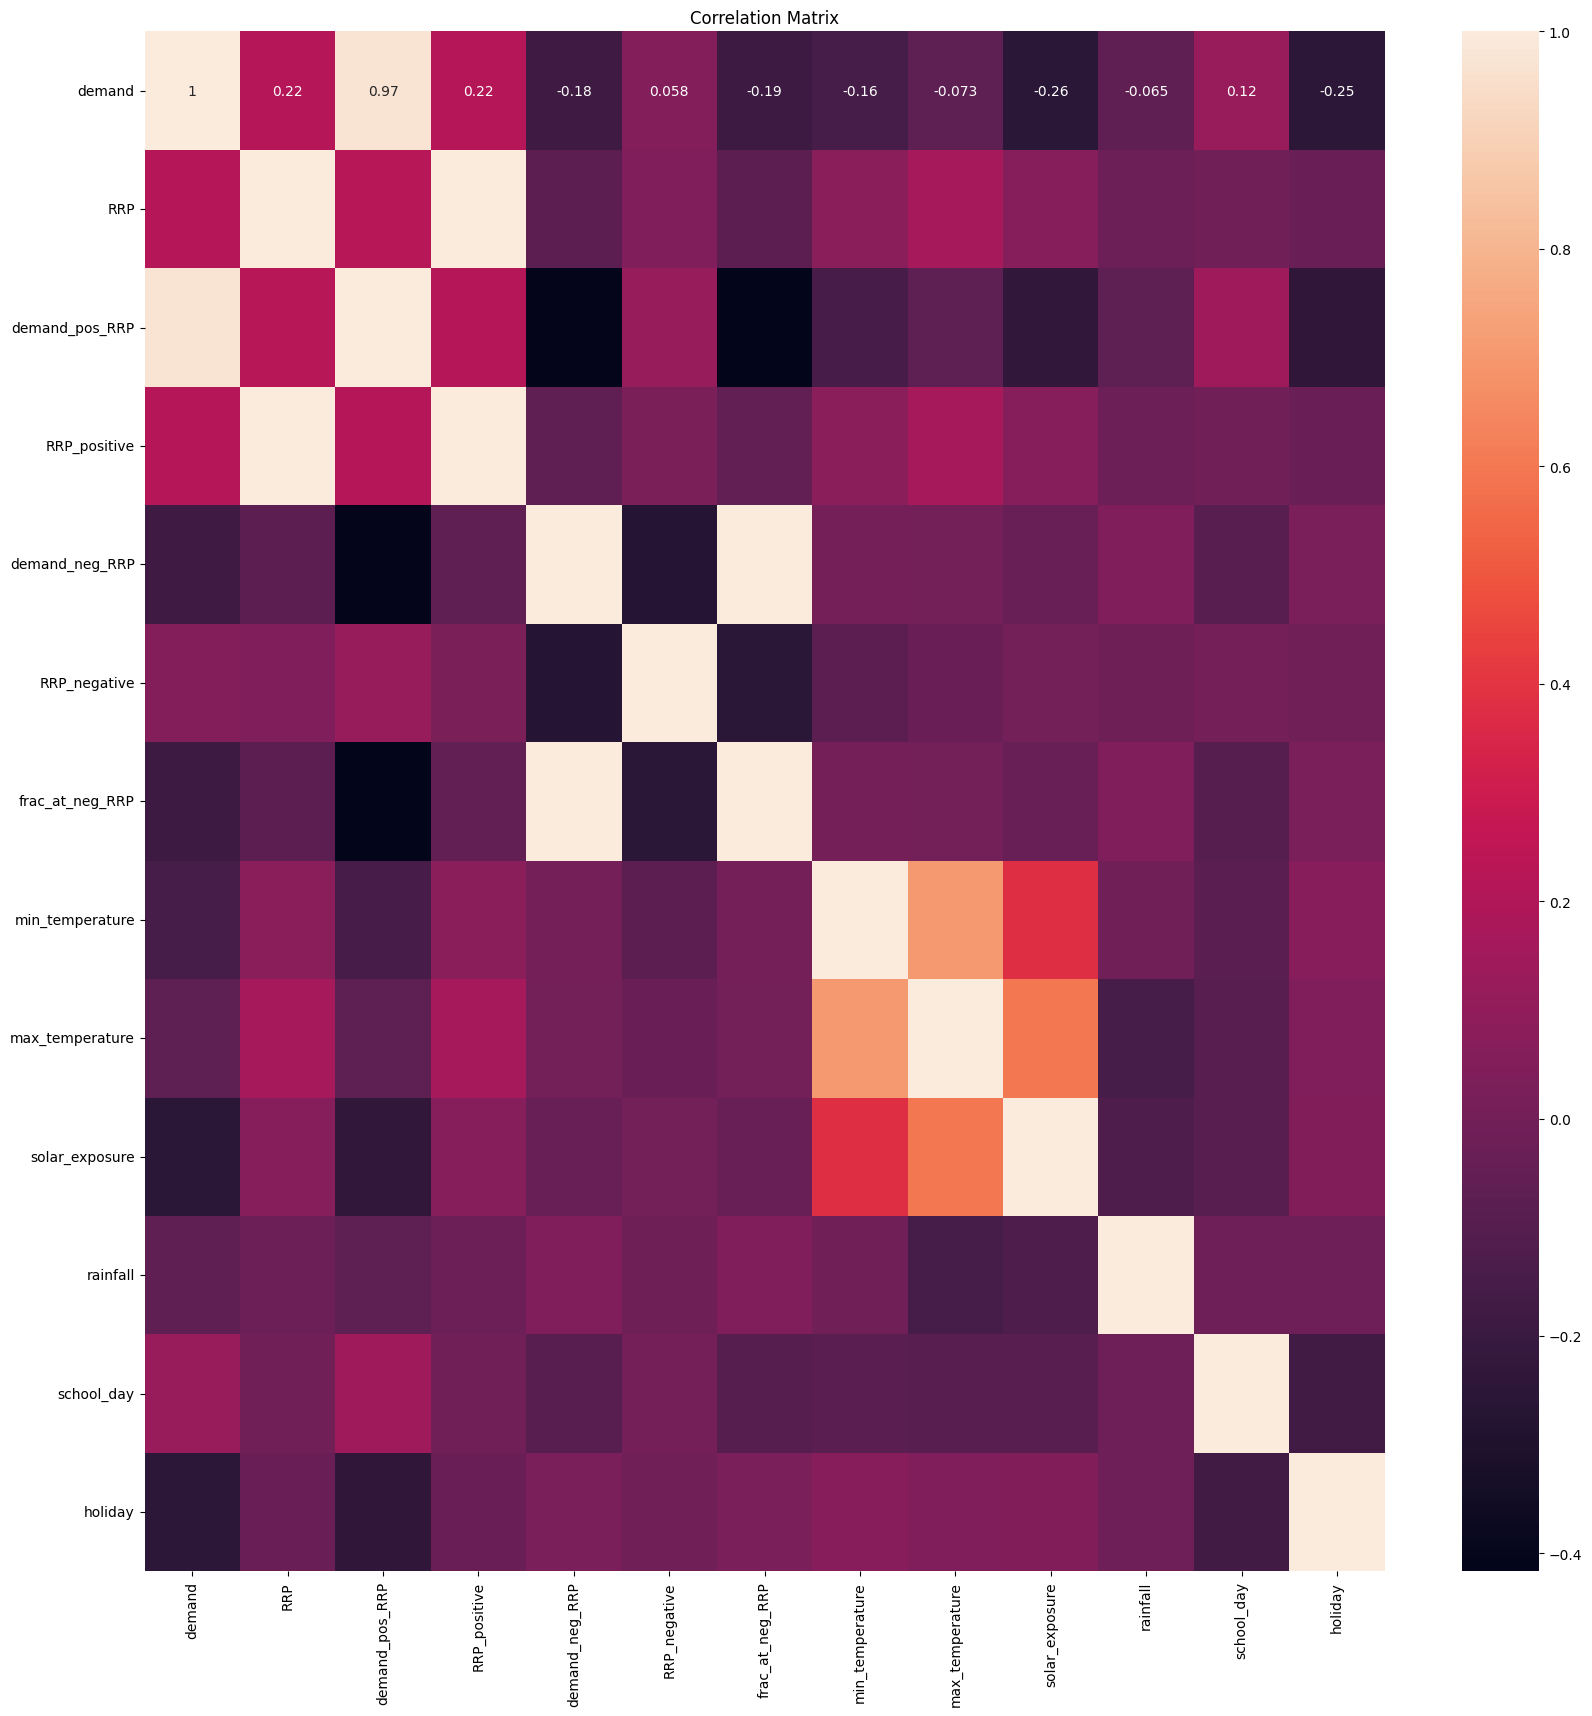

In [18]:
# Heat map
heat_map, ax = plt.subplots(figsize=(20, 20)) #Set size of the heat map
sns.heatmap(demand_dataset[demand_dataset.columns].corr(), annot=True, ax = ax)
plt.title("Correlation Matrix")
plt.show()

### Seasonality and trend analysis using seasonal_component with additive model (linear regression)

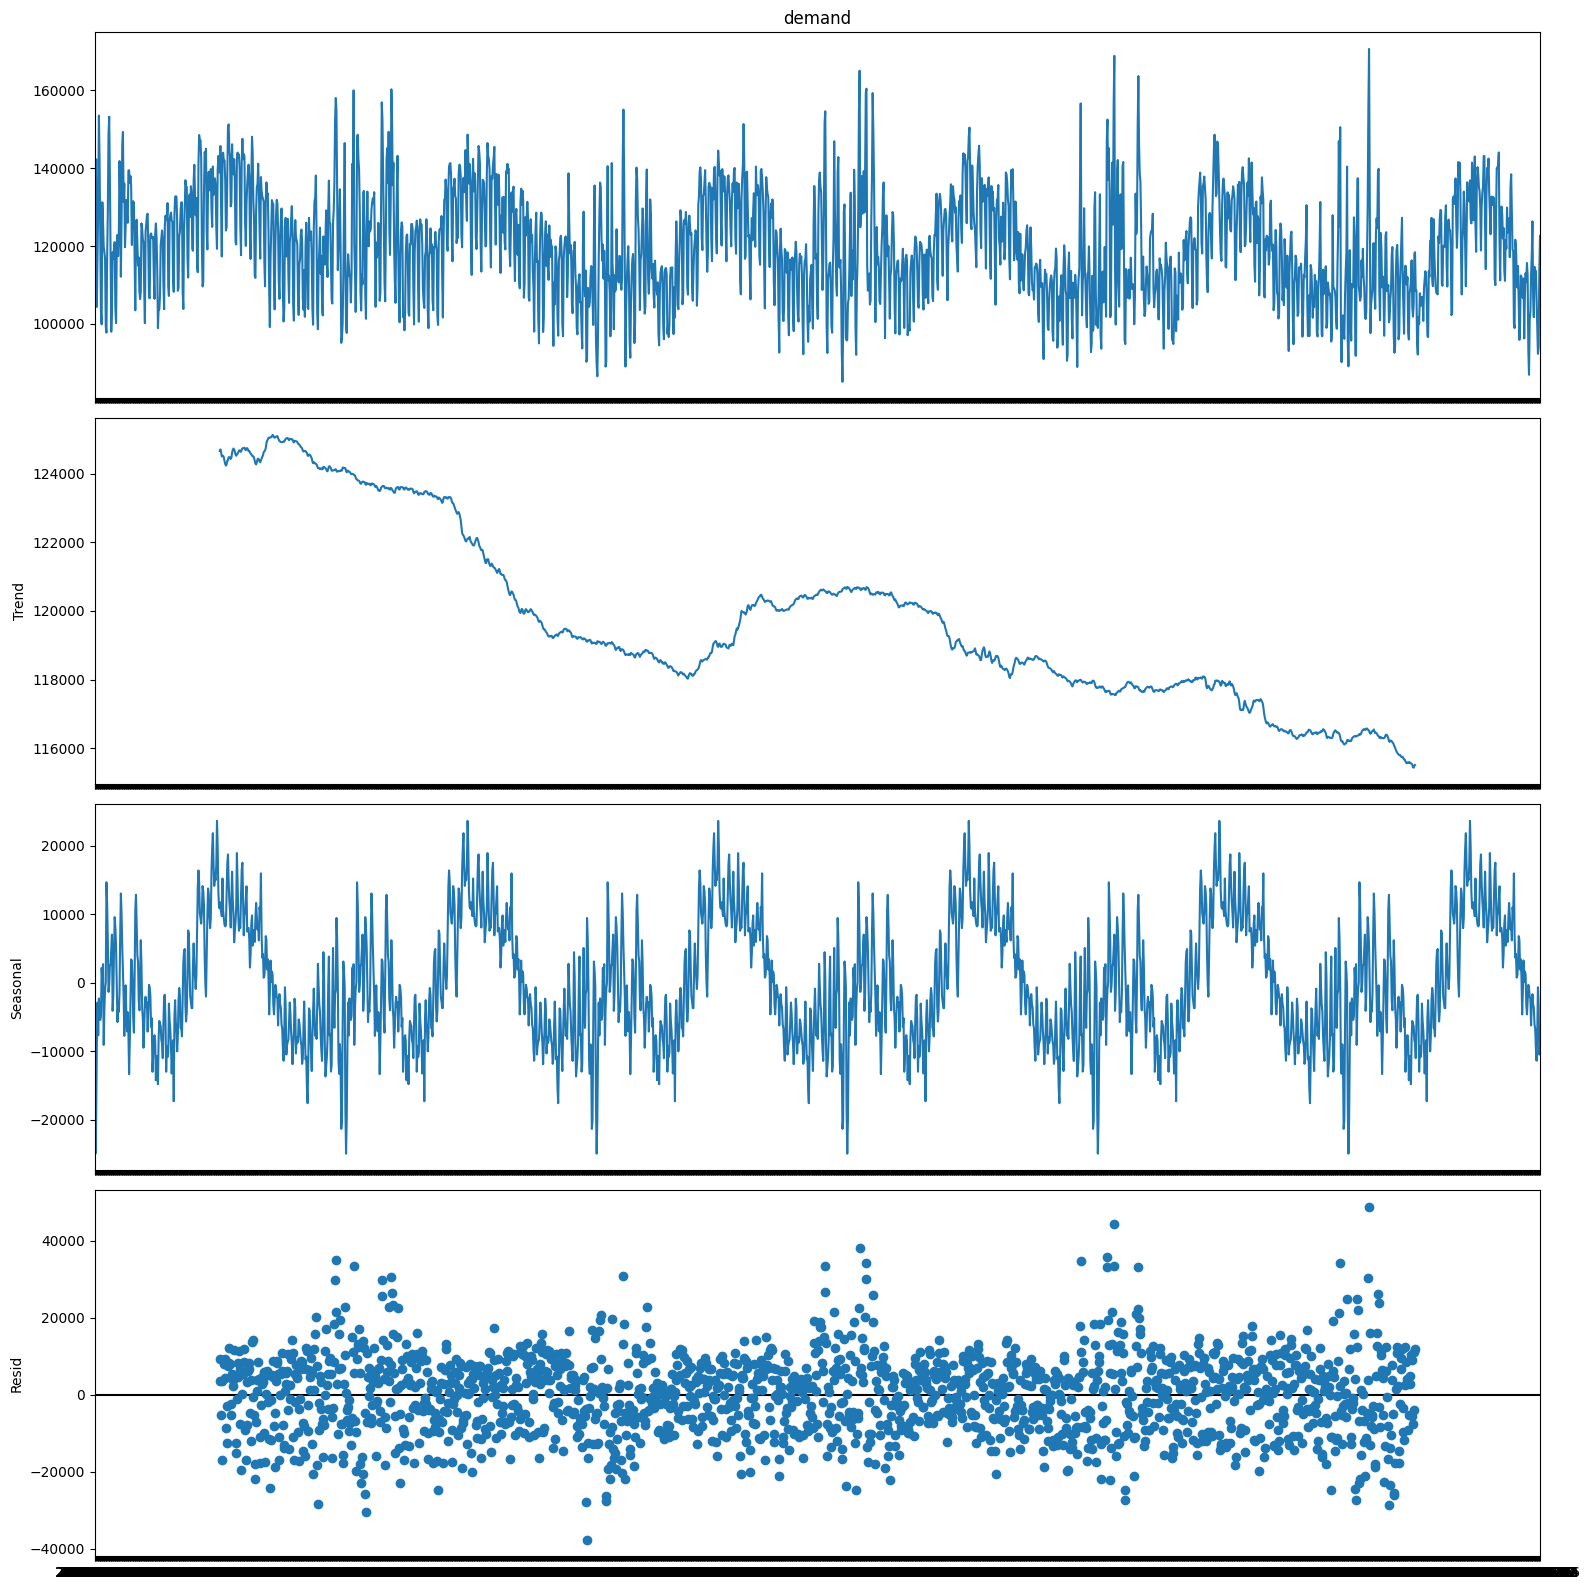

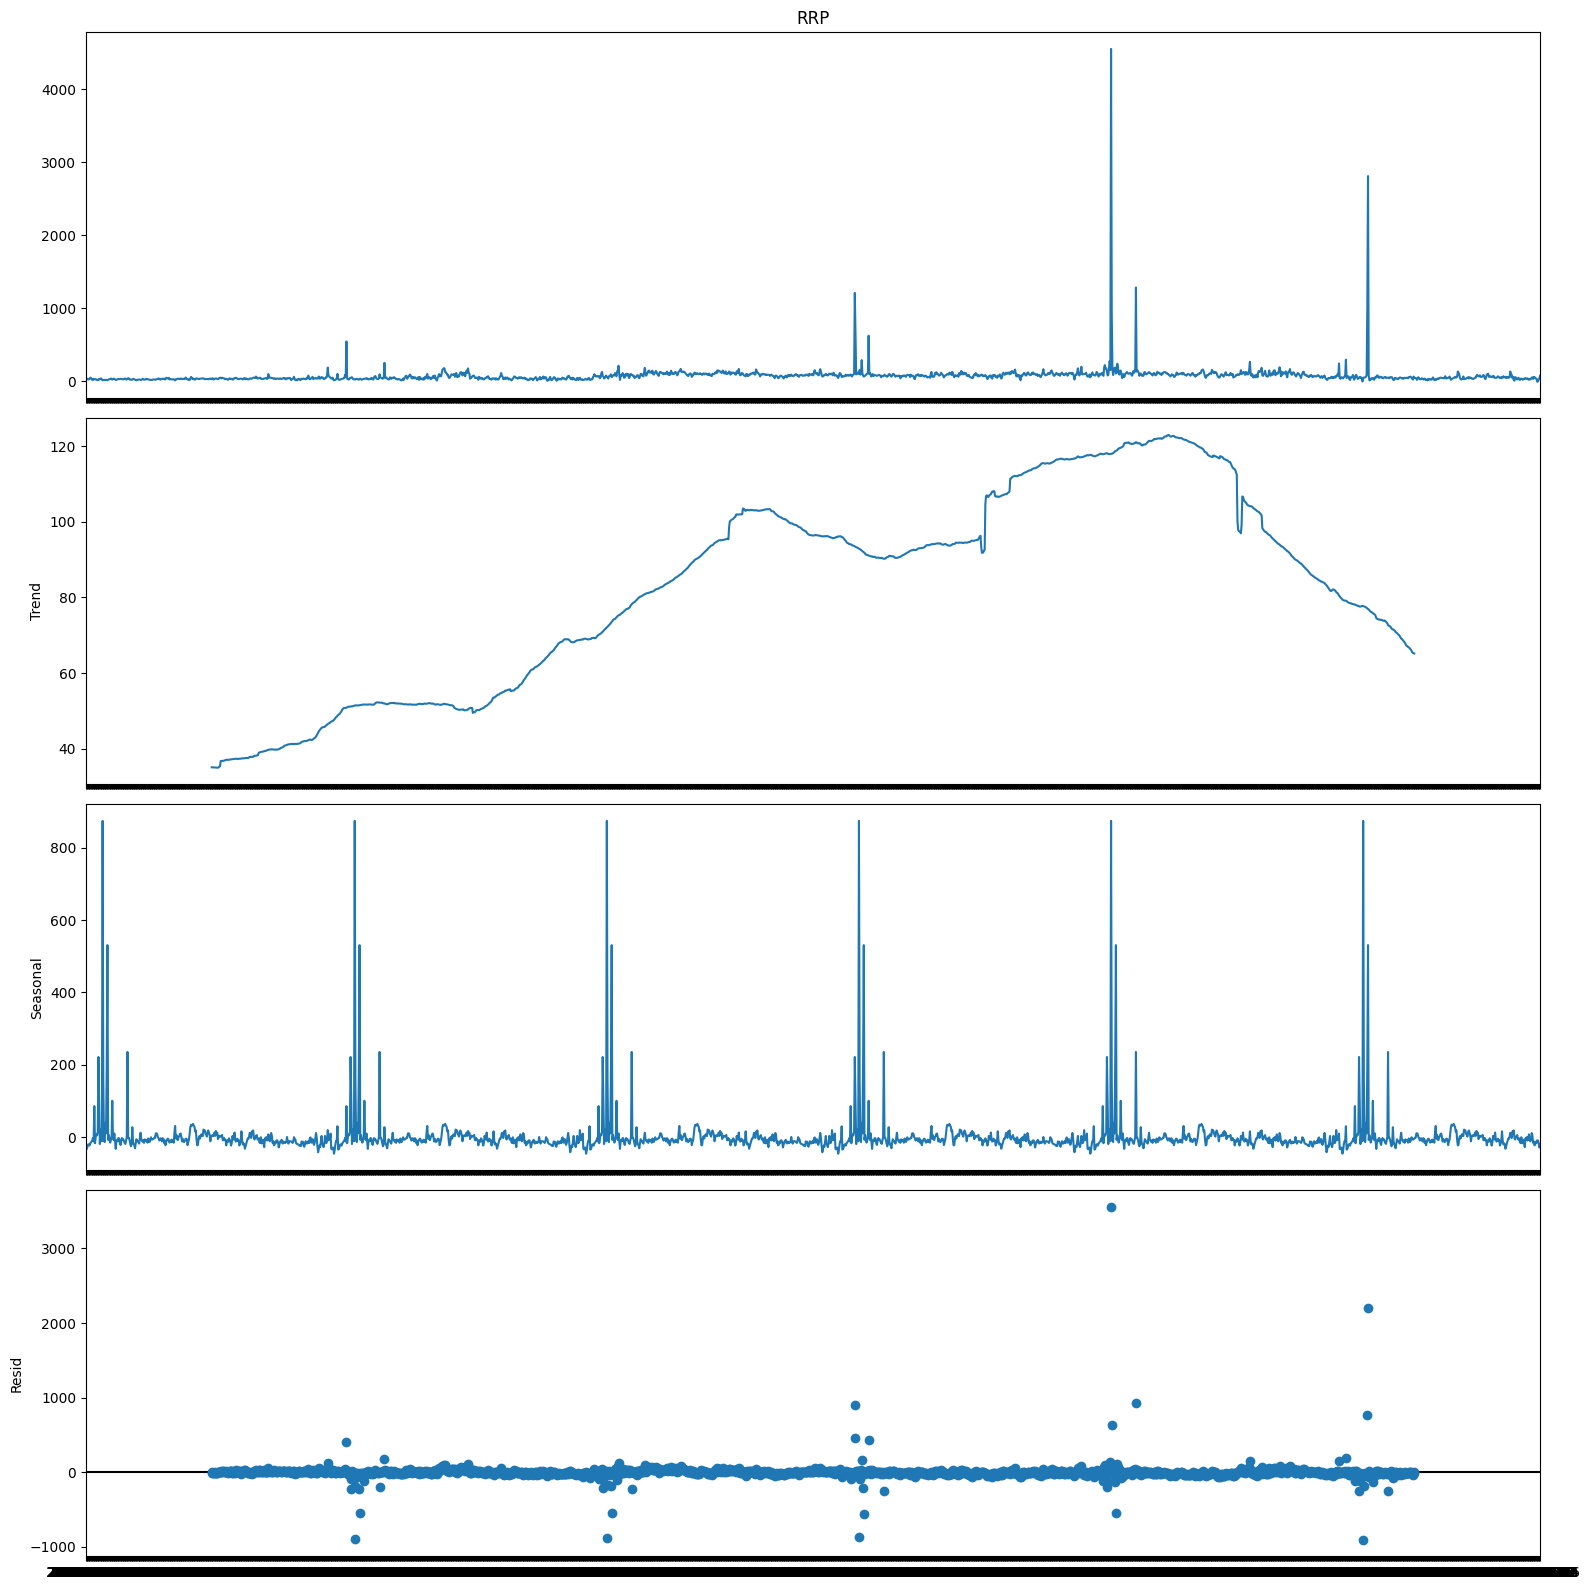

In [19]:
plt.rcParams["figure.figsize"] = (16, 16)
seasonal_decompose(demand_dataset['demand'], period=365, model='add').plot()
plt.show()
plt.rcParams["figure.figsize"] = (16, 16)
seasonal_decompose(demand_dataset['RRP'], period=365, model='add').plot()
plt.show()


### Outlier in Demand

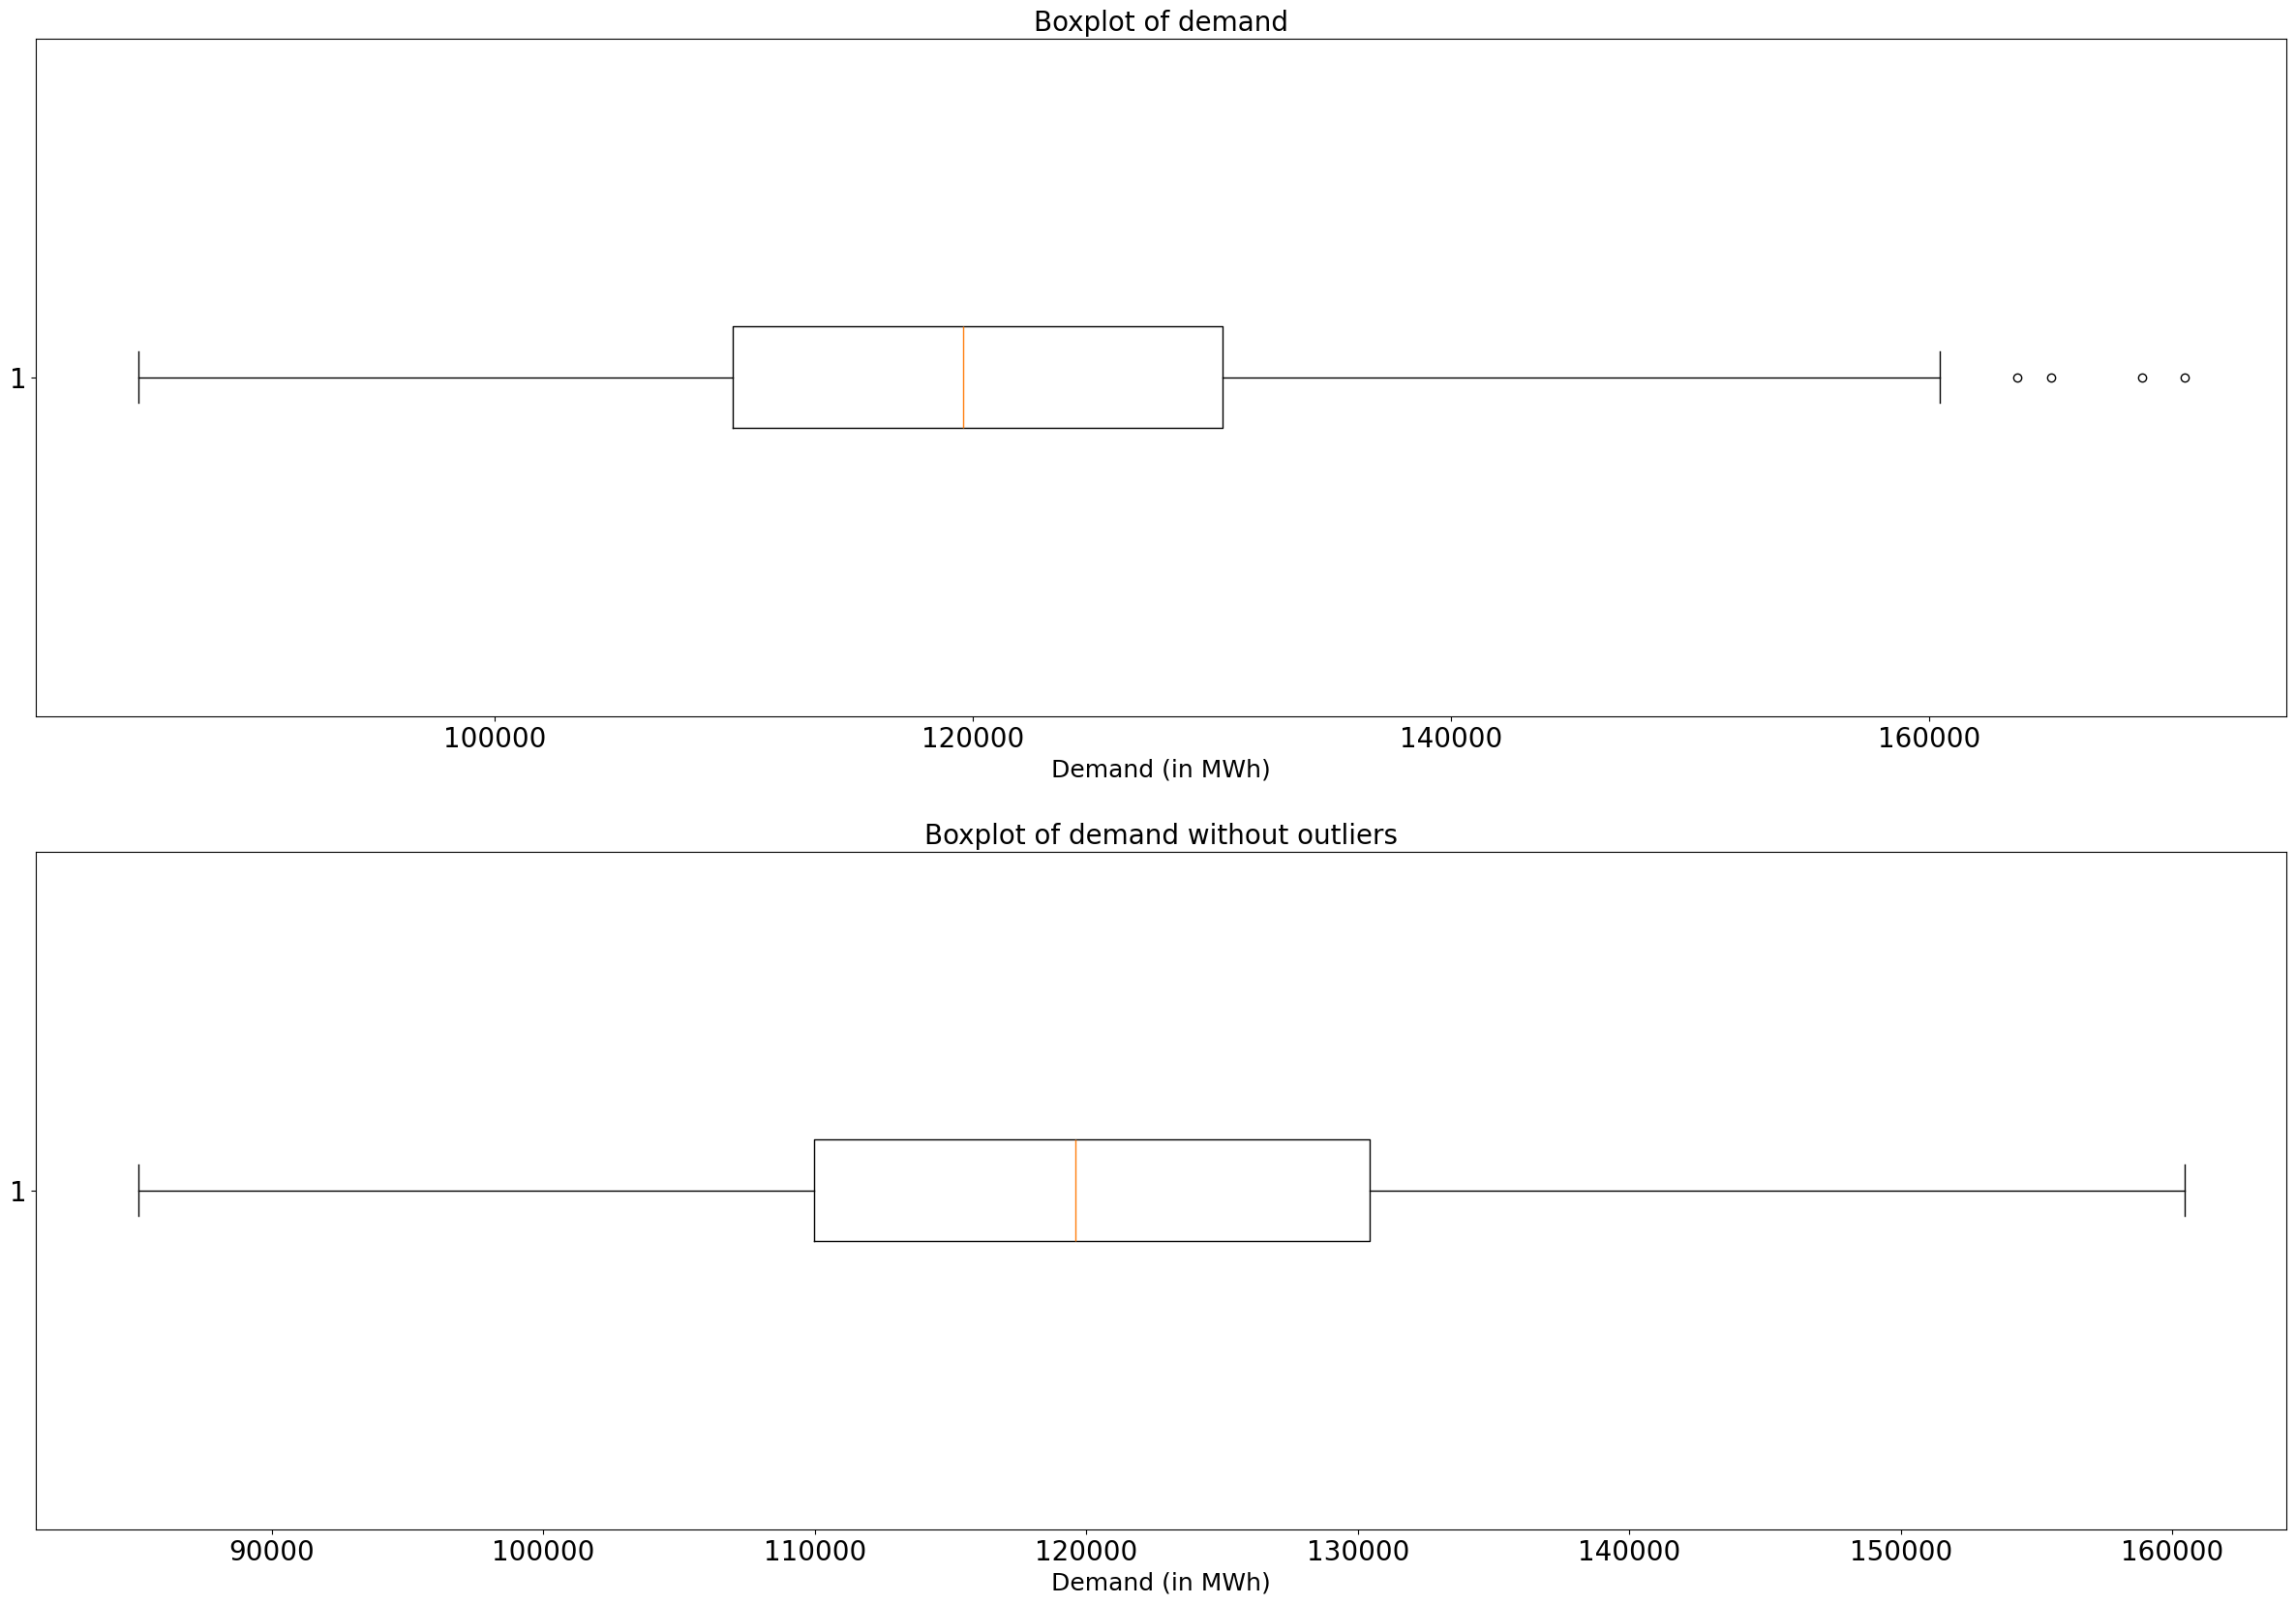

In [20]:
fig, ax = plt.subplots(2, 1, figsize = (30, 20))
ax[0].boxplot(demand_dataset['demand'], vert = False)
ax[0].tick_params(labelsize=20)
ax[0].set_title('Boxplot of demand', size = 20)
ax[0].set_xlabel("Demand (in MWh)", fontsize = 18)

ax[1].boxplot(demand_dataset['demand'], vert = False, showfliers= False)
ax[1].tick_params(labelsize=20)
ax[1].set_title("Boxplot of demand without outliers", size = 20)
ax[1].set_xlabel("Demand (in MWh)", fontsize = 18)

plt.show()

###Distribution plot of school_day and holiday

school_day
0     653
1    1453
dtype: int64 


 holiday
0    2029
1      77
dtype: int64


c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

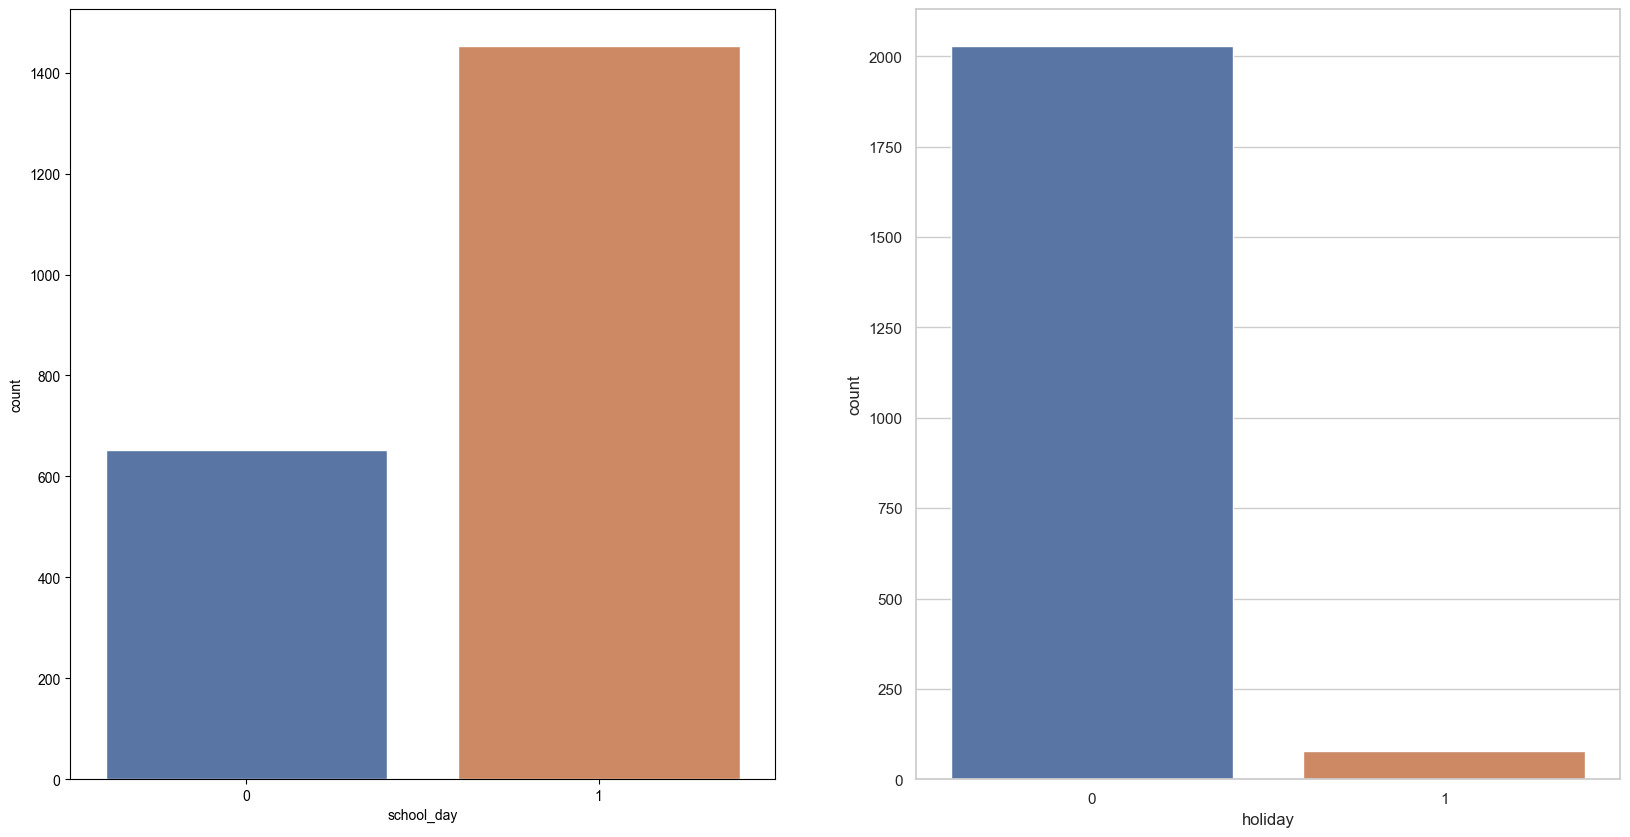

In [21]:
distSD = demand_dataset.groupby('school_day').size()
distHO = demand_dataset.groupby('holiday').size()
print(distSD, '\n'*3, distHO)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.set_theme(style = 'whitegrid')
sdDist = sns.countplot(x = demand_dataset['school_day'])
plt.subplot(1,2,2)
hoDist = sns.countplot(x = demand_dataset['holiday'])
plt.show()

# Data Preprocessing

Handle the missing value found in EDA with data from close weather station

In [22]:
df = demand_dataset.copy()
print(demand_dataset[demand_dataset.isnull().any(axis=1)])
df.at['2015-06-11', 'rainfall'] = 0
df.at['2018-10-09', 'rainfall'] = 0.4
df.at['2018-10-10', 'rainfall'] = 3.4
df['solar_exposure'].fillna(method = 'ffill', inplace = True)
print('\n*****New Data******\n')
print("New value for rainfall in 2015-06-11 is :", df.iloc[df.index.get_loc('2015-06-11')]['rainfall'])
print("New value for solar_exposure in 2017-11-26 is :", df.iloc[df.index.get_loc('2017-11-26')]['solar_exposure'])
print("New value for rainfall in 2018-10-09 is :", df.iloc[df.index.get_loc('2018-10-09')]['rainfall'])
print("New value for rainfall in 2018-10-10 is :", df.iloc[df.index.get_loc('2018-10-10')]['rainfall'])

print(df.isna().sum())
print(df[demand_dataset.isnull().any(axis=1)])

                demand        RRP  demand_pos_RRP  RRP_positive  \
date                                                              
2015-06-11  143465.445  37.481829      143465.445     37.481829   
2017-11-26  108717.875  83.114514      108717.875     83.114514   
2018-10-09  116449.310  99.000749      116449.310     99.000749   
2018-10-10  109551.080  73.539698      109551.080     73.539698   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2015-06-11             0.0           0.0              0.0              5.7   
2017-11-26             0.0           0.0              0.0             19.4   
2018-10-09             0.0           0.0              0.0             16.1   
2018-10-10             0.0           0.0              0.0             10.1   

            max_temperature  solar_exposure  rainfall  school_day  holiday  
date                                               

C:\Users\AB\AppData\Local\Temp\ipykernel_8024\2246771192.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['solar_exposure'].fillna(method = 'ffill', inplace = True)


In [28]:

def findOutlier(column):
    data = np.array(demand_dataset[column])
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    rowWithOutlier = demand_dataset[column].isin(outliers)
    outlierDF = df[rowWithOutlier]
    return outlierDF

In [36]:
featureSelected = ['demand',
                    'RRP',
                    'min_temperature',
                    'max_temperature',
                    'solar_exposure',
                    'rainfall']
for feature in featureSelected:
    print('*'*10 ,f'In feature {feature}, here are the outliers:\n\n', findOutlier(feature))



********** In feature demand, here are the outliers:

 (array([165070.595, 168894.845, 163682.04 , 170653.84 ]),                 demand          RRP  demand_pos_RRP  RRP_positive  \
date                                                                
2018-01-19  165070.595   647.574163      165070.595    647.574163   
2019-01-25  168894.845   906.437232      168894.845    906.437232   
2019-03-01  163682.040  1284.799876      163682.040   1284.799876   
2020-01-31  170653.840  2809.437516      170653.840   2809.437516   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2018-01-19             0.0           0.0              0.0             22.5   
2019-01-25             0.0           0.0              0.0             21.1   
2019-03-01             0.0           0.0              0.0             22.6   
2020-01-31             0.0           0.0              0.0             21.5   

   

In [47]:
_, outlierDF = findOutlier('demand')
demandOutIndex = outlierDF.index.to_list()
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
for feature in featureSelected:
    print(f'intersection of outlier for demand and {feature} is: '
          , intersection(findOutlier(feature).index.to_list()))

AttributeError: 'list' object has no attribute 'intersection'

# Initial attempt of Model training and testing

### Time series train test split

In [33]:
# Training set
train = df.loc[df.index < '2019-01-01']
test = df.loc[df.index >= '2019-01-01']
print(train)
print(test)
x_train = train.drop(labels='demand', axis=1)
y_train = train['demand']
x_test = test.drop(labels='demand', axis=1)
y_test = test['demand']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

                demand         RRP  demand_pos_RRP  RRP_positive  \
date                                                               
2015-01-01   99635.030   25.633696       97319.240     26.415953   
2015-01-02  129606.010   33.138988      121082.015     38.837661   
2015-01-03  142300.540   34.564855      142300.540     34.564855   
2015-01-04  104330.715   25.005560      104330.715     25.005560   
2015-01-05  118132.200   26.724176      118132.200     26.724176   
...                ...         ...             ...           ...   
2018-12-27  129749.140  102.310896      129749.140    102.310896   
2018-12-28  133831.375  121.460719      133831.375    121.460719   
2018-12-29  108290.110   91.723527      108290.110     91.723527   
2018-12-30   99613.865   84.166495       99613.865     84.166495   
2018-12-31  103381.915   84.897997      103381.915     84.897997   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                 

### Random Forest train

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

### Random Forest test

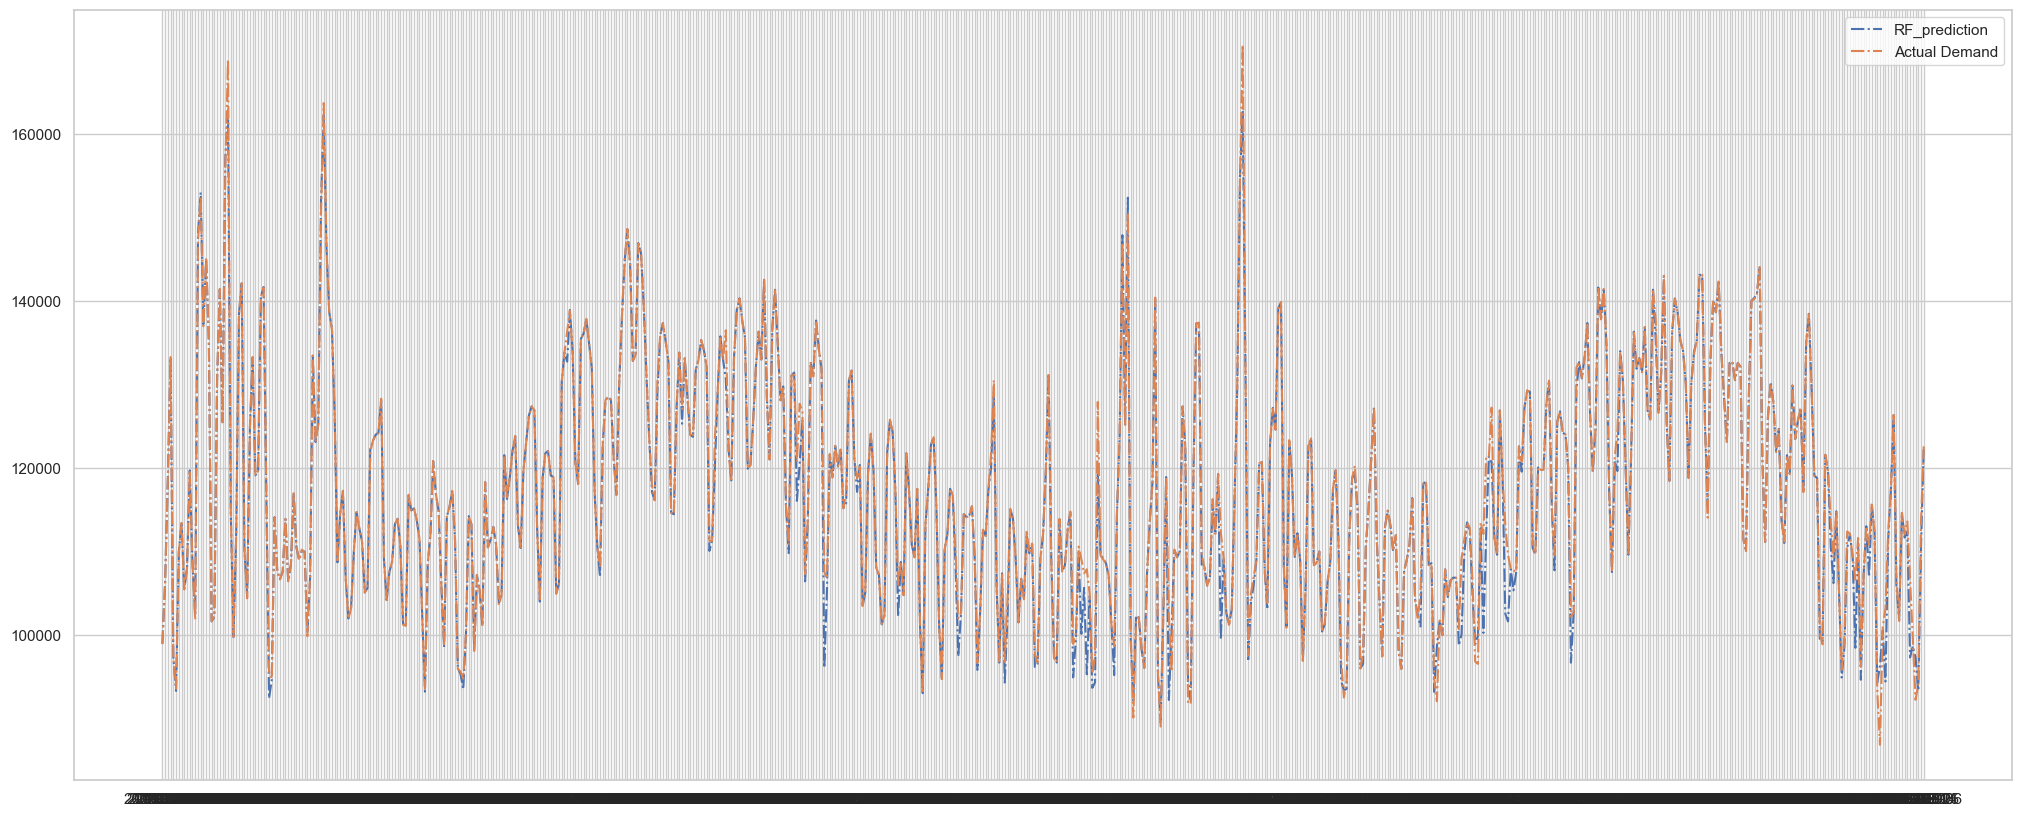

Mean_squared_error: 3461112.4450271223
Mean_absolute_error: 587.7949137984516
Root mean squared error: 1860.406526818029


In [19]:
rf_y_pred = rf_model.predict(x_test)
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(rf_y_pred ,label = "RF_prediction", linestyle = 'dashdot')
plt.plot(y_test, label = 'Actual Demand', linestyle = 'dashdot')
plt.legend(loc = 'upper right')
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean_squared_error:', mean_squared_error(y_test, rf_y_pred))
print('Mean_absolute_error:', mean_absolute_error(y_test, rf_y_pred))
print('Root mean squared error:',  np.sqrt(mean_squared_error(y_test, rf_y_pred)))

### SARIMA

### LSTM train

First we need to reformat the train/test set for the LSTM

In [20]:
demand_dataset = pd.read_csv(fileName)
demand_dataset['school_day'] = demand_dataset['school_day'].replace({'Y':1, 'N':0})
demand_dataset['holiday'] = demand_dataset['holiday'].replace({'Y':1, 'N':0})
demand_dataset[25:30]
df = demand_dataset.drop(['date'], axis=1)
df.at[161, 'rainfall'] = 0
df.at[1377, 'rainfall'] = 0.4
df.at[1378, 'rainfall'] = 3.4
df['solar_exposure'].fillna(method = 'ffill', inplace = True)

C:\Users\AB\AppData\Local\Temp\ipykernel_14864\967816321.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['solar_exposure'].fillna(method = 'ffill', inplace = True)


In [21]:
def convert_to_X_y(dataframe, window, forecasting_time):
    dataframe = dataframe.to_numpy()
    X = []
    y = []
    # for i in range(len(np_df)-window):
    #     row = [[n] for n in np_df[i:i+7]] # 7 -> 1 week
    #     X.append(row)
    #     label = np_df[i+7]
    #     y.append(label)

    for i in range (window, len(dataframe) - forecasting_time + 1):
        X.append(dataframe[i - window:i, 0: dataframe.shape[1]])
        y.append(dataframe[i+forecasting_time - 1: i+ forecasting_time, 0])
    
    return np.array(X), np.array(y)

In [22]:


X, y = convert_to_X_y(df, 7, 1)
X.shape, y.shape

((2099, 7, 13), (2099, 1))

Train test split


In [23]:
X_train, y_train = X[:1461], y[:1461]
X_test, y_test = X[1461:2099], y[1461:2099]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1461, 7, 13), (1461, 1), (638, 7, 13), (638, 1))

In [26]:
from keras.models import Sequential
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
 
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences= True))
lstm_model.add(LSTM(32, activation='relu', return_sequences=False))
lstm_model.add(Dense(y.shape[1]))
lstm_model.compile(loss = 'mse',
                    optimizer=Adam(learning_rate=0.001),
                    metrics = [RootMeanSquaredError()])
lstm_model.summary()
lstm_model.fit(X, y, epochs=100, batch_size= 10, validation_split=0.2, verbose= 1)
# lstm_model.add(InputLayer((7, 13)))
# lstm_model.add(LSTM(100))

# lstm_model.add(Dense(1, 'linear'))



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 64)             19968     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 32417 (126.63 KB)
Trainable params: 32417 (126.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
168/168 [==============================] - 2s 3ms/step - loss: 3037292544.0000 - root_mean_squared_error: 55111.6367 - val_loss: 1318724608.0000 - val_root_mean_squared_error: 36314.2461
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 122032

### SARIMA 